In [1]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from keras.utils import np_utils

In [25]:
os.listdir(train)

['aphids',
 'Cicadellidae',
 'Colomerus vitis',
 'corn borer',
 'corn earworm',
 'cutworm',
 'Dacus dorsalis(Hendel)',
 'Dasineura sp',
 'Deporaus marginatus Pascoe',
 'english grain aphid',
 'Erythroneura apicalis',
 'fall armyworm',
 'Field Cricket',
 'flax budworm',
 'flea beetle',
 'Fruit piercing moth',
 'Gall fly',
 'grain spreader thrips',
 'grasshopper',
 'green bug',
 'grub',
 'Icerya purchasi Maskell',
 'Indigo caterpillar',
 'Jute aphid',
 'Jute hairy',
 'Jute red mite',
 'Jute semilooper',
 'Jute stem girdler',
 'Jute Stem Weevil',
 'Jute stick insect',
 'large cutworm',
 'Lawana imitata Melichar',
 'Leaf beetle',
 'legume blister beetle',
 'Limacodidae',
 'Locust',
 'Locustoidea',
 'longlegged spider mite',
 'Lycorma delicatula',
 'lytta polita',
 'Mango flat beak leafhopper',
 'meadow moth',
 'Mealybug',
 'Miridae',
 'mites',
 'mole cricket',
 'Nipaecoccus vastalor',
 'odontothrips loti',
 'oides decempunctata',
 'paddy stem maggot',
 'Panonchus citri McGregor',
 'Papilio

In [2]:
train = (r'C:\Users\snehal\PycharmProjects\PestClassificationAndRecommendation\dataset\Pest_Dataset')
train_names =[]
train_names =[f for f in sorted(os.listdir(train))]
print(len(train_names))


103


In [3]:
print("Categories:")
for i in train_names:
    print(i)

Categories:
Cicadellidae
Colomerus vitis
Dacus dorsalis(Hendel)
Dasineura sp
Deporaus marginatus Pascoe
Erythroneura apicalis
Field Cricket
Fruit piercing moth
Gall fly
Icerya purchasi Maskell
Indigo caterpillar
Jute Stem Weevil
Jute aphid
Jute hairy
Jute red mite
Jute semilooper
Jute stem girdler
Jute stick insect
Lawana imitata Melichar
Leaf beetle
Limacodidae
Locust
Locustoidea
Lycorma delicatula
Mango flat beak leafhopper
Mealybug
Miridae
Nipaecoccus vastalor
Panonchus citri McGregor
Papilio xuthus
Parlatoria zizyphus Lucus
Phyllocnistis citrella Stainton
Phyllocoptes oleiverus ashmead
Pieris canidia
Pod borer
Polyphagotars onemus latus
Potosiabre vitarsis
Prodenia litura
Pseudococcus comstocki Kuwana
Rhytidodera bowrinii white
Rice Stemfly
Salurnis marginella Guerr
Scirtothrips dorsalis Hood
Spilosoma Obliqua
Sternochetus frigidus
Termite
Termite odontotermes (Rambur)
Tetradacus c Bactrocera minax
Thrips
Toxoptera aurantii
Toxoptera citricidus
Trialeurodes vaporariorum
Unaspis yan

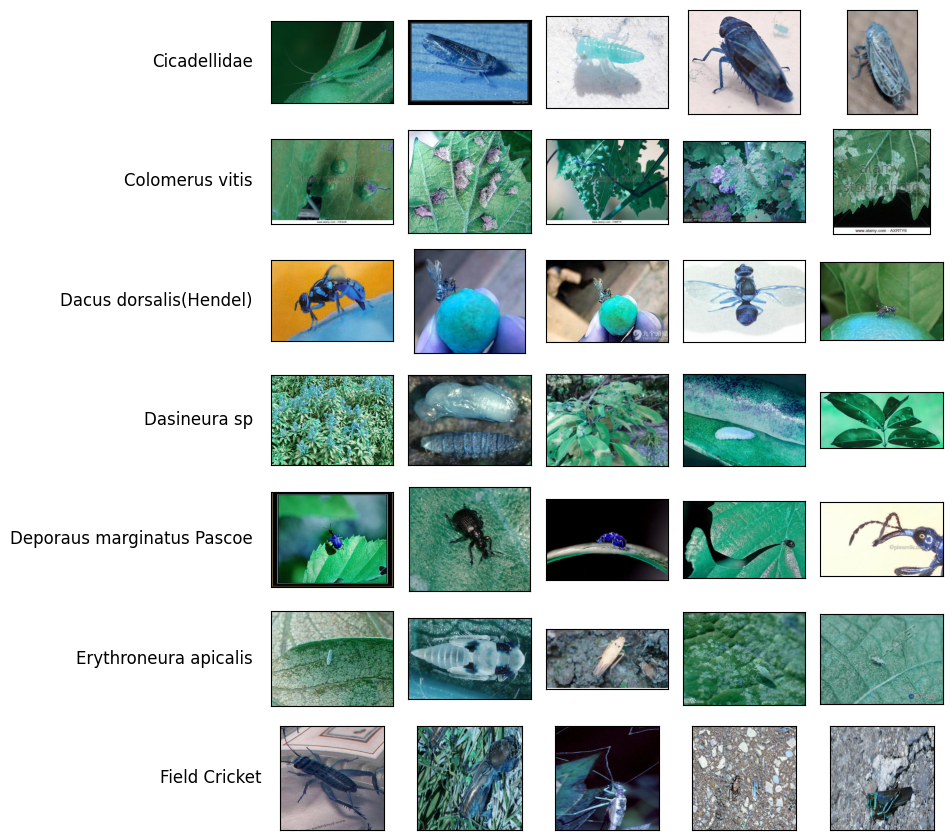

In [22]:
fig,ax = plt.subplots(nrows=7,ncols=5)
fig.set_size_inches(9.5,8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i in range(7):
    folder_path = train + '/' + str(train_names[i])
    image_names = [img for img in sorted(os.listdir(folder_path))][:5]
    
    for j in range(5):
        image_path = folder_path + '/' + image_names[j]
        image = cv2.imread(image_path) 
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if j == 0:
            ax[i,j].annotate(train_names[i], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - 5,0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.tight_layout()

In [23]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + "/" + expression))) + " " + expression + " images")

2012 aphids images
3444 Cicadellidae images
105 Colomerus vitis images
1018 corn borer images
125 corn earworm images
149 cutworm images
263 Dacus dorsalis(Hendel) images
303 Dasineura sp images
126 Deporaus marginatus Pascoe images
392 english grain aphid images
42 Erythroneura apicalis images
134 fall armyworm images
250 Field Cricket images
639 flax budworm images
473 flea beetle images
374 Fruit piercing moth images
490 Gall fly images
103 grain spreader thrips images
309 grasshopper images
195 green bug images
516 grub images
433 Icerya purchasi Maskell images
463 Indigo caterpillar images
386 Jute aphid images
429 Jute hairy images
346 Jute red mite images
391 Jute semilooper images
301 Jute stem girdler images
360 Jute Stem Weevil images
344 Jute stick insect images
294 large cutworm images
346 Lawana imitata Melichar images
316 Leaf beetle images
845 legume blister beetle images
840 Limacodidae images
331 Locust images
836 Locustoidea images
147 longlegged spider mite images
31

In [24]:
from keras.preprocessing.image import ImageDataGenerator

pic_size = 48
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(train ,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

# validation_generator = datagen_validation.flow_from_directory(validation,
#                                                     target_size=(pic_size,pic_size),
#                                                     color_mode="grayscale",
#                                                     batch_size=batch_size,
#                                                     class_mode='categorical',
#                                                     shuffle=False)

Found 44988 images belonging to 103 classes.


In [ ]:
# model= Sequential()
# model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3,)))
# model.add(Conv2D(filters=256,kernel_size = (3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.25)),
# model.add(BatchNormalization()),
# model.add(Conv2D(filters=150,kernel_size = (3,3),activation='relu'))
# model.add(MaxPool2D(2,2))
# model.add(Dropout(0.25)),
# model.add(BatchNormalization()),
# model.add(Conv2D(filters=70,kernel_size = (3,3),activation='relu'))

# model.add(Flatten())

# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.25)),
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.25)),
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.25)),
# model.add(Dense(5,activation = 'softmax'))

# model.compile(
#               loss='categorical_crossentropy', 
#               metrics=['acc'],
#               optimizer='adam'
#              )